# **Análisis Comparativo de Códigos CIE-10 entre Sistemas Rayen, Yani y MINSAL**

## 1. ¿Por Qué Importa la Consistencia en Códigos CIE-10?

*Contexto:* Los códigos de diagnóstico de un sistema de salud deben ser precisos para evitar errores clínicos y asegurar una atención uniforme. La interoperabilidad depende de que todos los sistemas usen códigos consistentes.

---

### Objetivo General del Proyecto
Comparar los códigos CIE-10 de los sistemas **Rayen** y **Yani** con la base **MINSAL** para responder preguntas clave sobre su calidad y consistencia.

---

### Preguntas Específicas del Análisis

- *¿Cuántos códigos son únicos en cada sistema?*
- *¿Qué códigos están duplicados o presentan descripciones inconsistentes?*
- *¿Cuántos códigos en Rayen y Yani están alineados o desactualizados frente a la codificación normativa definida por el MINSAL?*
- *¿Cómo podrían estas discrepancias impactar en el día a día de una práctica clínica?*

---

Este análisis busca profundizar en los elementos de calidad y precisión en la codificación, esenciales para una correcta interoperabilidad y un servicio de salud confiable.


## 2. Importación de Librerías y Configuración Inicial

Configuramos el entorno de trabajo y las librerías necesarias para manejar y visualizar los datos. Las configuraciones de advertencias y gráficos ayudarán a que el análisis sea visualmente claro y sin distracciones.

In [189]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


# Preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

# inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

## 3. Carga de Datos y Descripción General

En esta sección, cargaremos los datasets de los sistemas Rayen, Yani y la base oficial MINSAL para realizar una primera exploración del tamaño y estructura de cada una. A continuación, proporcionaremos detalles específicos de cada dataset, incluida la fecha de su última actualización, el total de códigos y observaciones preliminares sobre su organización.

*Carga de Archivos:* Los archivos serán importados desde sus ubicaciones respectivas para su análisis.

*Detalles de los Datasets:*

- Rayen: Última actualización en Noviembre de 2023. Esta base de datos contiene un total de **14.383** códigos.
- Yani: Última actualización en Octubre de 2024. Esta base de datos contiene un total de **12.568** códigos.
- MINSAL: Última actualización en Mayo de 2024. Esta base de datos contiene un total de **12.545** códigos. https://deis.minsal.cl/centrofic/#documentacion

*Resumen Inicial:* Presentamos un resumen rápido del tamaño y estructura de cada dataset para conocer la cantidad de códigos y su organización.

In [190]:
# Cargar archivos Excel
df_rayen = pd.read_excel('C:/Users/aalei/Desktop/IC_DA/CIE10_RAYEN.xlsx')
df_yani = pd.read_excel('C:/Users/aalei/Desktop/IC_DA/cie10_yani.xlsx')
df_minsal = pd.read_excel('C:/Users/aalei/Desktop/IC_DA/cie10_minsal.xlsx')

# Descripción básica de cada dataset
for name, df in [('Rayen', df_rayen), ('Yani', df_yani), ('MINSAL', df_minsal)]:
    print(f"{name} - Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    display(df.head())

Rayen - Filas: 14383, Columnas: 3


,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION
0,0,0,No Informado
1,A00,A00,Cólera.
2,A00.0,A00.0,"Cólera debido a vibrio cholerae o1, biotipo ch..."
3,A00.1,A00.1,"Cólera debido a vibrio cholerae o1, biotipo el..."
4,A00.9,A00.9,"Cólera, no especificado"


Yani - Filas: 14009, Columnas: 6


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO,IND_SEXO,IND_CAUEXT
0,A000,A00.0,"COLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO CH...","COLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO CH...",NaN,NaN
1,A001,A00.1,"COLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO EL...","COLERA DEBIDO A VIBRIO CHOLERAE O1, BIOTIPO EL...",NaN,NaN
2,A009,A00.9,"COLERA, NO ESPECIFICADO","COLERA, NO ESPECIFICADO",NaN,NaN
3,A010,A01.0,FIEBRE TIFOIDEA,FIEBRE TIFOIDEA,NaN,NaN
4,A011,A01.1,FIEBRE PARATIFOIDEA A,FIEBRE PARATIFOIDEA A,NaN,NaN


MINSAL - Filas: 12545, Columnas: 2


,Código,Descripción
0,A000,"Cólera debido a Vibrio cholerae O1, biotipo ch..."
1,A001,"Cólera debido a Vibrio cholerae O1, biotipo El..."
2,A009,"Cólera, no especificado"
3,A010,Fiebre tifoidea
4,A011,Fiebre paratifoidea


## 4. Exploración y Limpieza de Datos

### 4.1 Exploración de Nulos y columnas innecesarias

- *Valores Nulos:* Verificar y graficar los valores nulos por columna.
- *Columnas Innecesarias:* Eliminar columnas adicionales que no aportan información para el análisis en curso.


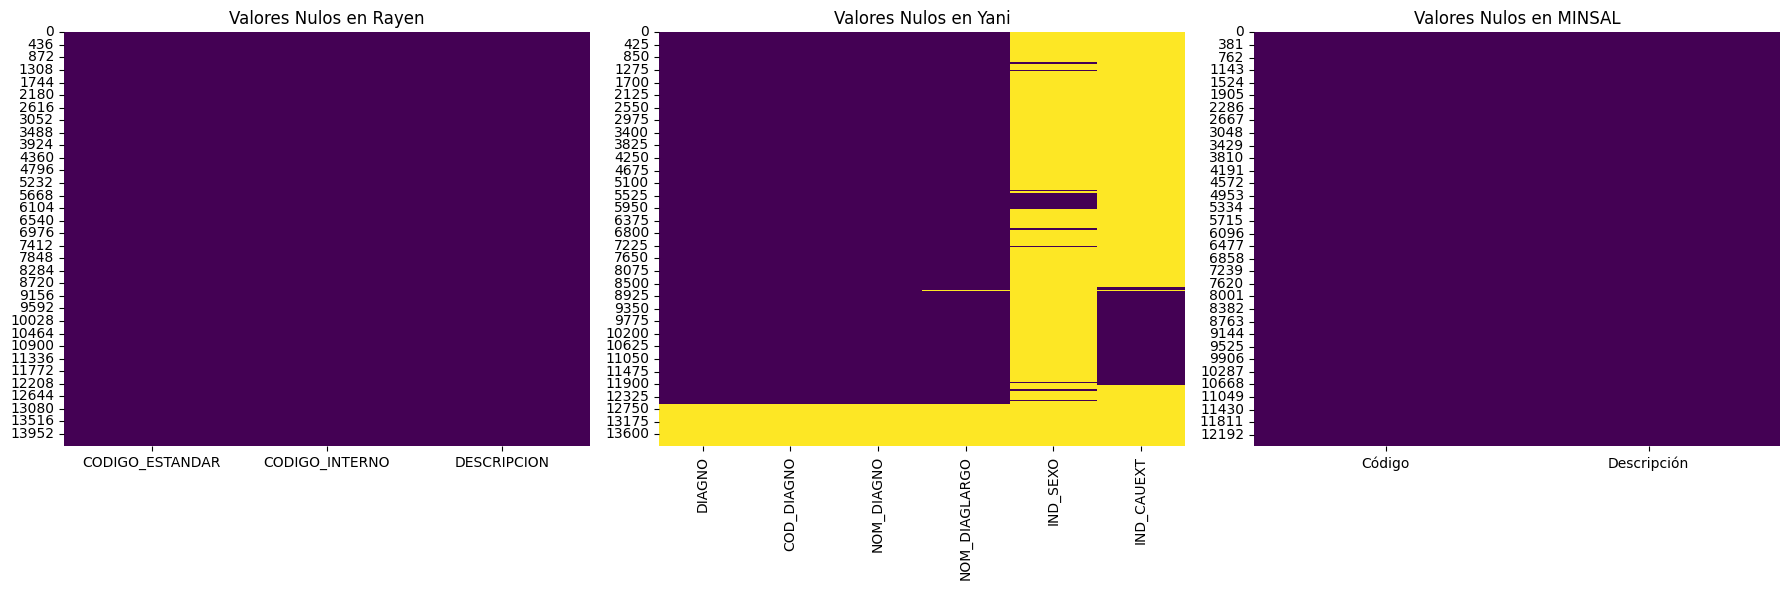

In [191]:
# Configuración de la figura para los tres heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap de valores nulos para Rayen
sns.heatmap(df_rayen.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Valores Nulos en Rayen')

# Heatmap de valores nulos para Yani
sns.heatmap(df_yani.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Valores Nulos en Yani')

# Heatmap de valores nulos para MINSAL
sns.heatmap(df_minsal.isnull(), cbar=False, cmap='viridis', ax=axes[2])
axes[2].set_title('Valores Nulos en MINSAL')

plt.tight_layout()
plt.show()


Se puede observar que la base de datos de Yani tiene muchos valores nulos, sin embargo, están principalmente en columnas innecesarias para el análisis en curso, por lo que se procede a eliminar dichas columnas y posteriormente manejar los valores nulos que sigan existiendo:

In [192]:
# Eliminar las columnas 'IND_SEXO' y 'IND_CAUEXT' de df_yani
df_yani = df_yani.drop(columns=['IND_SEXO', 'IND_CAUEXT'])

# Verificación de las columnas restantes
print('Columnas: ',df_yani.columns)

# Verificación de filas restantes
df_yani.info()

Columnas:  Index(['DIAGNO', 'COD_DIAGNO', 'NOM_DIAGNO', 'NOM_DIAGLARGO'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14009 entries, 0 to 14008
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DIAGNO         12568 non-null  object
 1   COD_DIAGNO     12568 non-null  object
 2   NOM_DIAGNO     12568 non-null  object
 3   NOM_DIAGLARGO  12566 non-null  object
dtypes: object(4)
memory usage: 437.9+ KB


In [193]:
# Filtrar y mostrar las filas con valores nulos en cualquier columna de df_yani
df_yani[df_yani.isnull().any(axis=1)]

,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO
8602,U119,U11.9,"NECESIDAD DE INMUNIZACIÓN CONTRA COVID-19, NO ...",NaN
8734,V221,V221,EMBAR.NORMAL/CONT.OT.EMB.NORMA,NaN
12561,NaN,NaN,NaN,NaN
12562,NaN,NaN,NaN,NaN
12563,NaN,NaN,NaN,NaN
...,...,...,...,...
13997,NaN,NaN,NaN,NaN
13998,NaN,NaN,NaN,NaN
13999,NaN,NaN,NaN,NaN
14000,NaN,NaN,NaN,NaN


In [194]:
# Reemplazar valores nulos en 'NOM_DIAGLARGO' con los valores de 'NOM_DIAGNO' en esas filas
df_yani['NOM_DIAGLARGO'].fillna(df_yani['NOM_DIAGNO'], inplace=True)

# Verificar las filas donde la columna 'DIAGNO' es 'U119' o 'V221'
df_yani[(df_yani['DIAGNO'] == 'U119') | (df_yani['COD_DIAGNO'] == 'V221')]


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO
8602,U119,U11.9,"NECESIDAD DE INMUNIZACIÓN CONTRA COVID-19, NO ...","NECESIDAD DE INMUNIZACIÓN CONTRA COVID-19, NO ..."
8734,V221,V221,EMBAR.NORMAL/CONT.OT.EMB.NORMA,EMBAR.NORMAL/CONT.OT.EMB.NORMA


In [195]:
# Eliminar nulos:
df_yani = df_yani.dropna()
df_minsal = df_minsal.dropna()

Se checkea nuevamente que las bases de datos no tengan valores nulos

Valores nulos en df_rayen:
 CODIGO_ESTANDAR    0
CODIGO_INTERNO     0
DESCRIPCION        0
dtype: int64

Valores nulos en df_yani:
 DIAGNO           0
COD_DIAGNO       0
NOM_DIAGNO       0
NOM_DIAGLARGO    0
dtype: int64

Valores nulos en df_minsal:
 Código         0
Descripción    0
dtype: int64


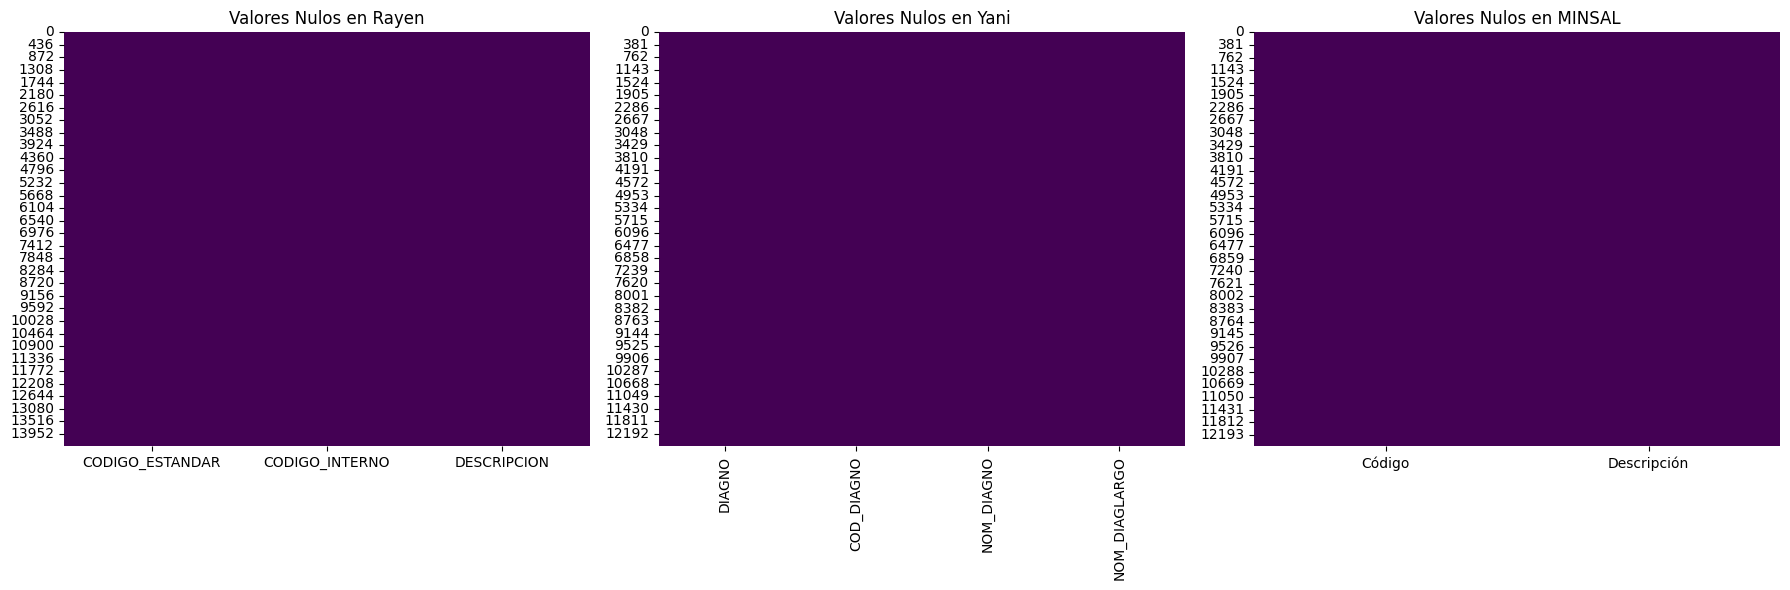

In [196]:
# Verificar si hay nulos
nulos_rayen = df_rayen.isnull().sum()
nulos_yani = df_yani.isnull().sum()
nulos_minsal = df_minsal.isnull().sum()
print("Valores nulos en df_rayen:\n", nulos_rayen)
print("\nValores nulos en df_yani:\n", nulos_yani)
print("\nValores nulos en df_minsal:\n", nulos_minsal)

# Configuración de la figura para los tres heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Heatmap de valores nulos para Rayen
sns.heatmap(df_rayen.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Valores Nulos en Rayen')

# Heatmap de valores nulos para Yani
sns.heatmap(df_yani.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Valores Nulos en Yani')

# Heatmap de valores nulos para MINSAL
sns.heatmap(df_minsal.isnull(), cbar=False, cmap='viridis', ax=axes[2])
axes[2].set_title('Valores Nulos en MINSAL')

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 12544 entries, 0 to 12544
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Código       12544 non-null  object
 1   Descripción  12544 non-null  object
dtypes: object(2)
memory usage: 294.0+ KB
None


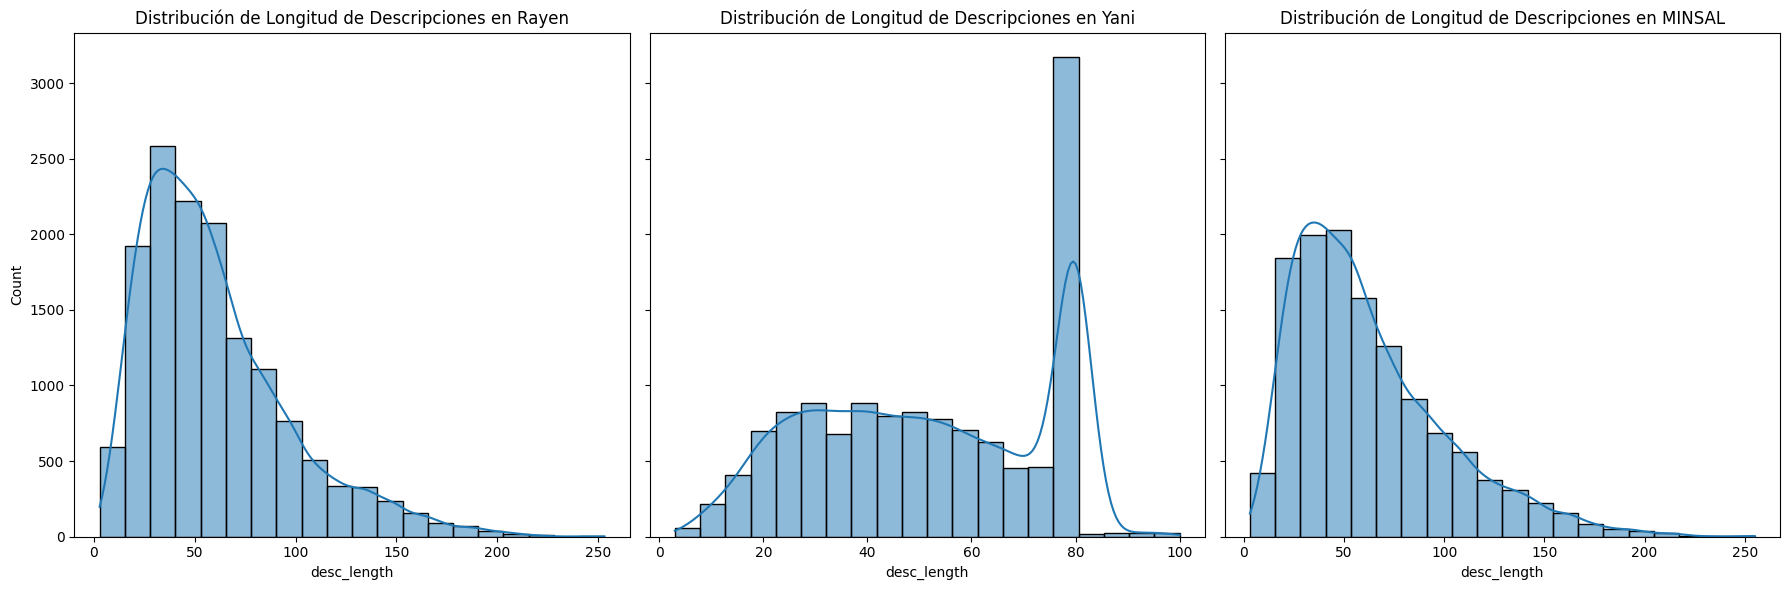

In [197]:
# Eliminar filas con valores nulos en las columnas de descripción
df_minsal = df_minsal.dropna()
# Verificar el resultado
print(df_minsal.info())

# Agregar la longitud de la descripción en cada dataset
df_rayen['desc_length'] = df_rayen['DESCRIPCION'].apply(len)
df_yani['desc_length'] = df_yani['NOM_DIAGLARGO'].apply(len)
df_minsal['desc_length'] = df_minsal['Descripción'].apply(len)

# Configurar la figura para los tres histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Histograma para Rayen
sns.histplot(df_rayen['desc_length'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Longitud de Descripciones en Rayen')

# Histograma para Yani
sns.histplot(df_yani['desc_length'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Longitud de Descripciones en Yani')

# Histograma para MINSAL
sns.histplot(df_minsal['desc_length'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribución de Longitud de Descripciones en MINSAL')

plt.tight_layout()
plt.show()


### 4.2 Exploración de Duplicados
- *Duplicados:* Detección de duplicados por columna código y descripción.
- *Duplicados código:* Detección de duplicados por columna código, es decir igual código pero diferente descripción.

In [198]:
# DUPLICADOS RAYEN
print("Filas: ", df_rayen.shape[0], "Columnas: ",df_rayen.shape[1], "Duplicados: ", df_rayen.duplicated().sum()) 
duplicated_rayen = df_rayen[df_rayen.duplicated(keep=False)]
df_rayen[df_rayen.duplicated(keep=False)]

Filas:  14383 Columnas:  4 Duplicados:  28


,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
14185,C84.4,C84.4,"Linfoma de células T periféricas, SAI",37
14186,C83.3,C83.3,Linfoma maligno difuso de células grandes hend...,50
14187,C83.3,C83.3,"Linfoma maligno difuso de células grandes, no ...",54
14188,C83.8,C83.8,"Linfoma maligno difuso, centroblástico-centroc...",51
14190,C83.4,C83.4,Linfoma maligno inmunoblástico,30
14191,C83.5,C83.5,Linfoma maligno linfoblástico,29
14192,C83.6,C83.6,"Linfoma maligno linfocítico difuso, diferencia...",61
14193,C85.7,C85.7,Linfoma maligno linfoplasmocítico,33
14194,C83.2,C83.2,"Linfoma maligno mixto, de células grandes y pe...",52
14195,C85.1,C85.1,Linfoma monocitoide de células B,32


In [199]:
# DUPLICADOS YANI
print("Filas: ", df_yani.shape[0], "Columnas: ",df_yani.shape[1], "Duplicados: ", df_yani.duplicated().sum()) 
duplicated_yani = df_yani[df_yani.duplicated(keep=False)]
df_yani[df_yani.duplicated(keep=False)]

Filas:  12568 Columnas:  5 Duplicados:  0


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO,desc_length


In [200]:
# DUPLICADOS MINSAL
print("Filas: ", df_minsal.shape[0], "Columnas: ",df_minsal.shape[1], "Duplicados: ", df_minsal.duplicated().sum()) 
duplicated_minsal = df_minsal[df_minsal.duplicated(keep=False)]
df_minsal[df_minsal.duplicated(keep=False)]

Filas:  12544 Columnas:  3 Duplicados:  0


,Código,Descripción,desc_length


In [201]:
# Rayen: Codigos duplicados pero diferente descripción
duplicated_rayen_codigo = df_rayen[df_rayen.duplicated(subset=['CODIGO_ESTANDAR'], keep=False) & (df_rayen['DESCRIPCION'] != df_rayen.groupby('CODIGO_ESTANDAR')['DESCRIPCION'].transform('first'))]
print("Duplicados de código, pero diferente descripción: ", len(duplicated_rayen_codigo)) 
duplicated_rayen_codigo

Duplicados de código, pero diferente descripción:  126


,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
4236,J21.9,J21.9,Síndrome bronquial obstructivo agudo,36
4237,J21.9,J21.9,Síndrome bronquial obstructivo recurrente,41
14159,E66.9,E66.9,Obesidad secundaria a otras patologías,38
14161,R63.5,R63.5,Sobrepeso,9
14162,E78,E78,Dislipidemia,12
...,...,...,...,...
14298,K03.6,K03.6,Otros depósitos blandos densos: materia alba,44
14299,E78.1,E78.1,Hipertrigliceridemia,20
14308,Z30.4,Z30.4,Supervision de Anticonceptivos orales,37
14323,D47.1,D47.1,Enfermedad mieloproliferativa,29


In [202]:
# Algunos ejemplos curiosos de Rayen
df_rayen[df_rayen['CODIGO_ESTANDAR']=='K03.6']

,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
4394,K03.6,K03.6,Depósitos [acreciones] en los dientes,37
14204,K03.6,K03.6,Otros depósitos especificados sobre los dientes,47
14205,K03.6,K03.6,"Depósitos sobre los dientes, sin especificar",44
14296,K03.6,K03.6,Cálculo dentario subgingival,28
14297,K03.6,K03.6,Cálculo dentario supragingival,30
14298,K03.6,K03.6,Otros depósitos blandos densos: materia alba,44


In [203]:
df_rayen[df_rayen['CODIGO_ESTANDAR']=='J21.9']

,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
4172,J21.9,J21.9,"Bronquiolitis aguda, no especificada",36
4236,J21.9,J21.9,Síndrome bronquial obstructivo agudo,36
4237,J21.9,J21.9,Síndrome bronquial obstructivo recurrente,41


In [204]:
df_rayen[df_rayen['CODIGO_ESTANDAR']=='D47.1']

,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
14322,D47.1,D47.1,Enfermedad mieloproliferativa crónica,37
14323,D47.1,D47.1,Enfermedad mieloproliferativa,29
14366,D47.1,D47.1,Enfermedad mieloproliferativa crónica,37
14367,D47.1,D47.1,Enfermedad mieloproliferativa,29


In [205]:
# Yani: Codigos duplicados pero diferente descripción
duplicated_yani_codigo = df_yani[df_yani.duplicated(subset=['DIAGNO'], keep=False) & (df_yani['NOM_DIAGNO'] != df_yani.groupby('DIAGNO')['NOM_DIAGNO'].transform('first'))]
print("Duplicados de código, pero diferente descripción: ", len(duplicated_yani_codigo)) 
df_yani[df_yani['DIAGNO'].duplicated()]

Duplicados de código, pero diferente descripción:  15


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO,desc_length
4986,M800,M800,TUMO,TUMO,4
5018,M843,M843,TUMO,TUMO,4
5028,M855,M855,TUMO,TUMO,4
5048,M880,M880,TUMO,TUMO,4
5065,M904,M90.4,OSTEONECROSIS DEBIDA A HEMOGLOBINOPATIA (D50-D...,OSTEONECROSIS DEBIDA A HEMOGLOBINOPATIA (D50-D...,54
5071,M910,M910,TUMO,TUMO,4
5073,M911,M911,MESO,MESO,4
5084,M925,M925,TUMO,TUMO,4
5086,M926,M926,OTRO,OTRO,4
5105,M953,M953,MENI,MENI,4


In [206]:
# MINSAL: Codigos duplicados pero diferente descripción
duplicated_minsal_codigo = df_minsal[df_minsal.duplicated(subset=['Código'], keep=False) & (df_minsal['Código'] != df_minsal.groupby('Código')['Descripción'].transform('first'))]
print("Duplicados de código, pero diferente descripción: ", len(duplicated_minsal_codigo)) 
df_minsal[df_minsal['Código'].duplicated()]

Duplicados de código, pero diferente descripción:  0


,Código,Descripción,desc_length


## 5. Comparación entre Bases de Datos: Descubriendo Concordancias y Discrepancias

### 5.1 Identificación de Códigos Comunes y Únicos

Identificación de Códigos Únicos y Comunes: Encontramos los códigos que están en ambas bases (Rayen y MINSAL, Yani y MINSAL) y los que son exclusivos de cada sistema.

Visualización Comparativa: Gráfico de barras que muestre la cantidad de códigos únicos y comunes entre las bases.

In [207]:
# Para esto primero hay que quitar el punto de los códigos
df_rayen['CODIGO_ESTANDAR'] = df_rayen['CODIGO_ESTANDAR'].astype(str)
df_rayen['CODIGO_ESTANDAR'] = df_rayen['CODIGO_ESTANDAR'].str.replace('.', '', regex=False)
df_rayen.head()

,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
0,0,0,No Informado,12
1,A00,A00,Cólera.,7
2,A000,A00.0,"Cólera debido a vibrio cholerae o1, biotipo ch...",52
3,A001,A00.1,"Cólera debido a vibrio cholerae o1, biotipo el...",50
4,A009,A00.9,"Cólera, no especificado",23


In [208]:
# Códigos que estan en MINSAL pero no en en Rayen
minsal_rayen = df_minsal[~df_minsal['Código'].isin(df_rayen['CODIGO_ESTANDAR'])]
print('Códigos que estan en MINSAL pero NO en rayen',len(minsal_rayen))
#minsal_rayen.to_excel("siminsal_norayen.xlsx", index=False)
minsal_rayen

Códigos que estan en MINSAL pero NO en rayen 424


,Código,Descripción,desc_length
58,A090,Otras gastroenteritis y colitis de origen infe...,52
59,A099,Gastroenteritis y colitis de origen no especif...,51
160,A33X,Tétanos neonatal,16
161,A34X,Tétanos obstétrico,18
162,A35X,Otros tétanos,13
...,...,...,...
12429,Y69X,Incidentes no especificados durante la atenció...,67
12516,Y86X,Secuelas de otros accidentes,29
12542,Y95X,Afección nosocomial,19
12543,Y96X,Afección relacionada con el trabajo,35


In [209]:
# CODIGOS QUE ESTAN EN MINSAL PERO NO EN YANI
minsal_yani = df_minsal[~df_minsal['Código'].isin(df_yani['DIAGNO'])]
print('Códigos que estan en MINSAL pero NO en Yani',len(minsal_yani))

#minsal_yani.to_excel("siminsal_noyani.xlsx", index=False)
minsal_yani.head()

Códigos que estan en MINSAL pero NO en Yani 4


,Código,Descripción,desc_length
6956,R98X,Muerte sin asistencia,21
8943,E352,Trastornos de otras glándulas endocrinas en en...,83
9065,H751,Otros trastornos especificados del oído medio ...,115
9068,H941,Otros trastornos especificados del oído en enf...,82


In [239]:
# CODIGOS QUE ESTAN EN YANI PERO NO EN MINSAL
yani_minsal = df_yani[~df_yani['DIAGNO'].isin(df_minsal['Código'])]
print('Códigos que estan en Yani pero NO en MINSAL',len(yani_minsal))

#minsal_yani.to_excel("siminsal_noyani.xlsx", index=False)
yani_minsal

Códigos que estan en Yani pero NO en MINSAL 13


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO,desc_length
1881,E358,E35.8,TRASTORNOS DE OTRAS GLANDULAS ENDOCRINAS EN ENFER,TRASTORNOS DE OTRAS GLANDULAS ENDOCRINAS EN EN...,88
2492,G052,G05.2,"ENCEFALITIS, MIELITIS Y ENCEFALOMIELITIS EN OTR E","ENCEFALITIS, MIELITIS Y ENCEFALOMIELITIS EN OT...",70
3130,H758,H75.8,OTROS TRASTORNOS ESPECIFICADOS DEL OIDO MEDIO ...,OTROS TRASTORNOS ESPECIFICADOS DEL OIDO MEDIO ...,80
3175,H948,H94.8,OTROS TRASTORNOS ESPECIFICADOS DEL OIDO EN ENF...,OTROS TRASTORNOS ESPECIFICADOS DEL OIDO EN ENF...,80
8602,U119,U11.9,"NECESIDAD DE INMUNIZACIÓN CONTRA COVID-19, NO ...","NECESIDAD DE INMUNIZACIÓN CONTRA COVID-19, NO ...",58
11930,Y98X,Y98,AFECCION RELACIONADA CON EL ESTILO DE VIDA,AFECCION RELACIONADA CON EL ESTILO DE VIDA,42
14002,W261,W26.1,"CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...","CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...",80
14003,W262,W26.2,"CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...","CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...",80
14004,W263,W26.3,"CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...","CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...",80
14005,W264,W26.4,"CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...","CONTACTO TRAUMATICO CON CUCHILLO, ESPADA, DAGA...",78


In [224]:
# CODIGOS QUE ESTAN EN RAYEN Y NO EN MINSAL
rayen_minsal = df_rayen[~df_rayen['CODIGO_ESTANDAR'].isin(df_minsal['Código'])]
print('Códigos que estan en MINSAL pero NO en Yani', len(rayen_minsal))
#rayen_minsal.to_excel("sirayen_nominsal.xlsx", index=False)
rayen_minsal

Códigos que estan en MINSAL pero NO en Yani 2134


,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
0,0,0,No Informado,12
1,A00,A00,Cólera.,7
5,A01,A01,Fiebres tifoidea y paratifoidea,31
11,A02,A02,Otras infecciones debidas a salmonella,38
17,A03,A03,Shigelosis,10
...,...,...,...,...
14371,U119,U11.9,"Necesidad de inmunización contra COVID-19, no ...",58
14373,U08,U08,Historia personal de COVID-19,29
14374,U09,U09,Condición de salud posterior a COVID-19,39
14375,U10,U10,Síndrome inflamatorio multisistémico asociado ...,58


In [229]:
# DE LOS 2134 CÓDIGOS REVISAR CUÁLES CORRESPONDEN A CATEGORÍAS
filtered_df = rayen_minsal[rayen_minsal['CODIGO_ESTANDAR'].str.match(r'^[A-Z]\d{1,2}$')]
#filtered_df.to_excel("sirayen_nominsal_second.xlsx", index=False)
print('Codigos que corresponden a categorías y NO a subcategorías CIE10: ', len(filtered_df))
filtered_df

Codigos que corresponden a categorías y NO a subcategorías CIE10:  2024


,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
1,A00,A00,Cólera.,7
5,A01,A01,Fiebres tifoidea y paratifoidea,31
11,A02,A02,Otras infecciones debidas a salmonella,38
17,A03,A03,Shigelosis,10
24,A04,A04,Otras infecciones intestinales bacterianas,42
...,...,...,...,...
14356,Q38,Q38,"Otras malformaciones congénitas de la lengua, ...",72
14373,U08,U08,Historia personal de COVID-19,29
14374,U09,U09,Condición de salud posterior a COVID-19,39
14375,U10,U10,Síndrome inflamatorio multisistémico asociado ...,58


In [230]:
# Códigos de 1 a tres digitos, con inconsistencias:
filtered_2 = rayen_minsal[~rayen_minsal['CODIGO_ESTANDAR'].str.match(r'^[A-Z]\d{1,2}$')]
filtered_2.to_excel("sirayen_nominsal_nocateg.xlsx", index=False)
print(len(filtered_2))


filtered_2.head(30)

110


,CODIGO_ESTANDAR,CODIGO_INTERNO,DESCRIPCION,desc_length
0,0,0,No Informado,12
1345,C832,C83.2,"Linfoma no hodgkin mixto, de células pequeñas ...",64
1347,C834,C83.4,Linfoma no hodgkin inmunoblástico (difuso),42
1349,C836,C83.6,Linfoma no hodgkin indiferenciado (difuso),42
1356,C842,C84.2,Linfoma de zona t,17
1357,C843,C84.3,Linfoma linfoepitelioide,24
1361,C850,C85.0,Linfosarcoma,12
1367,C881,C88.1,Enfermedad de cadena pesada alfa,32
1379,C912,C91.2,Leucemia linfocitica subaguda,29
1397,C932,C93.2,Leucemia monocitica subaguda,28


In [231]:
# Eliminar duplicados yani
df_yani = df_yani.dropna(subset=['DIAGNO'])

In [232]:
# DUPLICADOS YANI
# Eliminar duplicados yani
df_yani=df_yani.drop_duplicates() # son puros nan
print("Filas: ", df_yani.shape[0], "Columnas: ",df_yani.shape[1], "Duplicados: ", df_yani.duplicated().sum()) 
df_yani[df_yani.duplicated()]

Filas:  12568 Columnas:  5 Duplicados:  0


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO,desc_length


In [235]:
duplicated_yani_codigo = df_yani[df_yani['DIAGNO'].duplicated(keep=False)]
duplicated_yani_codigo.to_excel("duplicated_yani_codigo.xlsx", index=False)
print(len(duplicated_yani_codigo))
df_yani[df_yani['DIAGNO'].duplicated(keep=False)]

30


,DIAGNO,COD_DIAGNO,NOM_DIAGNO,NOM_DIAGLARGO,desc_length
4985,M800,M80.0,"OSTEOPOROSIS POSTMENOPAUSICA, CON FRACTURA PAT...","OSTEOPOROSIS POSTMENOPAUSICA, CON FRACTURA PAT...",53
4986,M800,M800,TUMO,TUMO,4
5017,M843,M84.3,"FRACTURA POR TENSION, NO CLASIFICADA EN OTRA P...","FRACTURA POR TENSION, NO CLASIFICADA EN OTRA P...",50
5018,M843,M843,TUMO,TUMO,4
5027,M855,M85.5,QUISTE OSEO ANEURISMATICO,QUISTE OSEO ANEURISMATICO,25
5028,M855,M855,TUMO,TUMO,4
5047,M880,M88.0,ENFERMEDAD DE PAGET DEL CRANEO,ENFERMEDAD DE PAGET DEL CRANEO,30
5048,M880,M880,TUMO,TUMO,4
5064,M904,M904,TUMO,TUMO,4
5065,M904,M90.4,OSTEONECROSIS DEBIDA A HEMOGLOBINOPATIA (D50-D...,OSTEONECROSIS DEBIDA A HEMOGLOBINOPATIA (D50-D...,54


## 6. Visualización de Resultados Clave

### 6.1 Gráficos Atractivos para Resumir los Resultados

- *Diagrama de Venn:* Representa códigos comunes y únicos entre las tres bases.
- *Gráficos de Barras para Códigos Únicos y Comunes:* Compara la cantidad de códigos únicos y compartidos entre Rayen, Yani y MINSAL.

In [240]:
# Obtener los conjuntos de códigos únicos en cada dataframe
codigos_yani = set(df_yani['DIAGNO'].dropna().unique())
codigos_minsal = set(df_minsal['Código'].dropna().unique())
codigos_rayen = set(df_rayen['CODIGO_INTERNO'].dropna().unique())

# Encontrar los códigos en común en los tres conjuntos
codigos_comunes = codigos_yani.intersection(codigos_minsal, codigos_rayen)

# Mostrar los códigos comunes
print("Códigos en común entre df_yani, df_minsal y df_rayen:")
print(codigos_comunes)


Códigos en común entre df_yani, df_minsal y df_rayen:
{'O060', 'O030', 'I482', 'M726', 'U822', 'I481', 'I484', 'R91X', 'O040', 'N40X', 'I483', 'O050', 'I489', 'J09X'}


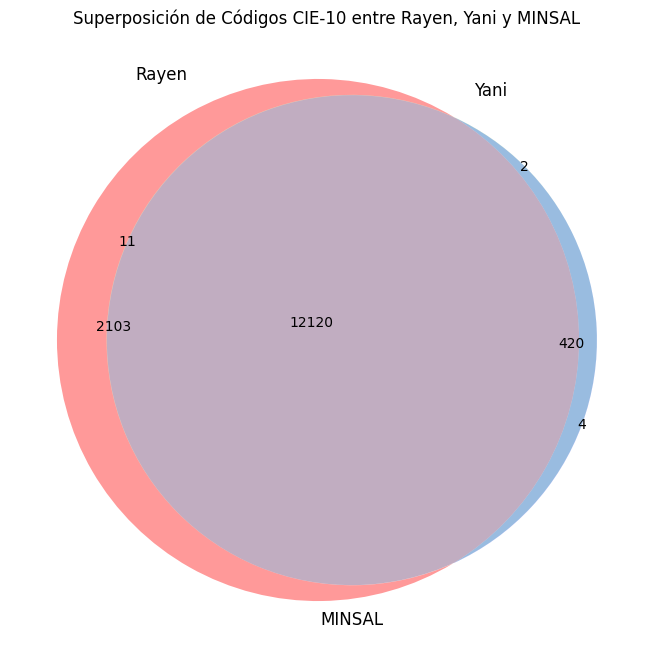

In [246]:
# Crear conjuntos de códigos únicos en cada dataframe
codigos_rayen = set(df_rayen['CODIGO_ESTANDAR'].dropna().unique())
codigos_yani = set(df_yani['DIAGNO'].dropna().unique())
codigos_minsal = set(df_minsal['Código'].dropna().unique())

# Generar el diagrama de Venn con los conjuntos
plt.figure(figsize=(10, 8))
venn3([codigos_rayen, codigos_yani, codigos_minsal], 
      set_labels=('Rayen', 'Yani', 'MINSAL'))

plt.title('Superposición de Códigos CIE-10 entre Rayen, Yani y MINSAL')
plt.show()


## 7. Conclusiones Narrativas y Recomendaciones para la Estandarización

**Conclusiones:** Resumir con una historia las discrepancias y consistencias encontradas, presentando a los lectores un escenario claro de los problemas y fortalezas de cada sistema.

**Impacto Clínico:** Explica cómo estas inconsistencias podrían afectar la práctica clínica en términos de diagnóstico y tratamiento.
 
**Actualización de Descripciones:** Ajustar descripciones entre sistemas para evitar errores de interpretación.

**Automatización del Proceso de Validación:** Implementar un sistema de validación continua para verificar y actualizar los códigos regularmente.
Propuesta de Unificación Nacional: Sugerir que se adopte la base MINSAL como referencia principal y que todos los sistemas se actualicen en función de esta base.